# 3. Variáveis aleatórias

Quando realizamos um experimento ou analisamos algum resultado é comum que não estejamos interessados no resultado em sí, mas sim em uma função do resultado. Por exemplo, considere que dois dados são lançados e registramos os resultados de cada face, podemos encontrar resultados como 1 e 5, 2 e 3 e assim por diante. Os resultados individuais podem ser irrelevantes, no caso nossa preocupação pode ser a soma das faces. Nesse cenário teríamos 10 possíveis resultados $\{ 2, 3, ..., 11, 12\}$. Nesse caso, eles não ocorrem com igual frequência. Tome como exemplo o resultado dois para a soma, há apenas uma combinação que resulta nesse valor: 1 e 1, em cada dado. Por outro lado, o resultado 8 pode ocorrer de formas diferentes: 2 e 6, 3 e 5, 4 e 4.

Podemos entender uma variável aleatória como uma função sobre os resultados de um experimento que extrai os valores de interesse para nosso estudo. Por exemplo, ao analisar uma população de pessoas há varias informações disponíveis sobre elas: nome, altura, idade, sexo etc.

Se considerarmos o sexo atribuido no nascimento teríamos dois casos possíveis: masculino e feminimo. Trata-se de uma informação categórica. Por outro lado, a altura é uma medida que varia aproximadamente de forma contínua (1,72; 1,68, 1,54, ...).

Os dois exemplos anteriores ilustram que temos tipos de dados diferentes, o que implica distribuições diferentes de informações. Variáveis aleatórias podem ser divididas em duas categorias: discretas e contínuas.

De forma geral, representaremos uma variável aleatória por letras maiúsculas: $X$, ou $Y$, ...

In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## 3.1. Variáveis aleatórias discretas

Chamamos de variáveis aleatórias discretas as que podem assumir um resultado dentre um conjunto enumerável (finito ou infinito). Vamos esclarecer isso com exemplos:

- Podemos condificar a informação de sexo em número, por exemplo podemos assumir o padrão 0 para sexo feminino e 1 para masculino. No cenário que estamos avaliando teríamos apenas dois casos.
- Outra situação seria dados de contagem, considere o número de visitas que uma pessoa faz ao pronto socorro em um ano, ela pode ir uma vez, duas, três... ou nenhuma. A rigor não há um limite

Para cada caso teríamos distribuições diferentes. Iremos analisar alguns exemplos a seguir.

Variáveis aleatórias discretas são modeladas por distribuições de probabilidade, ocasionalmente chamadas de função massa de probabilidade (FMP). Usamos esse nome para diferenciar de função densidade de probabilidade (FDP), usadas para variáveis contínuas.

### 3.1.1. A distribuição de Bernoulli

A distribuição de Bernoulli pode assumir um de dois valores: $\{0, 1\}$. Ela é parametrizada por um parâmetro $p$, que indica a probabilidade do caso $1$. Ela foi inicialmente proposta para modelar o lançamento de uma moeda, nesse caso é comum referir-se a $p$ como probabilidade de sucesso. Sua FDM é dada por:

\begin{equation}
    \mathbb{P}(X = x) = p^x (1-p)^{1-x}
\end{equation}

Tomando o caso da moeda como exemplo, codificamos os resultados da seguinte maneira:

\begin{equation*}
    X = 
    \begin{cases}
        0 \textnormal{ se cara}\\
        1 \textnormal{ se coroa}
    \end{cases}
\end{equation*}

Assim, temos:

\begin{align*}
    \mathbb{P}(X = 0) &= p^0(1-p)^{1-0} = 1*(1-p)^1 = 1-p \\
    \mathbb{P}(X = 1) &= p^1(1-p)^{1-1} = p*(1-p)^0 = p
\end{align*}

Se a probabilide de sucesso é 50%, temos uma moeda "honesta", em que as probabilidades se tornam: $\mathbb{P}(X=0) = 0.5$ e $\mathbb{P}(X=1) = 0.5$. Caso a moeda fosse viciada, teríamos outra situação, por exemplo se a probabilidade de sucesso fosse $p = 0.6$, teríamos que a probabilidade de cara seria $\mathbb{P}(X=0) = 0.4$, ou coroa $\mathbb{P}(X = 1) = 0.6$.

Quando um variável aleatória de interesse segue uma distribuição de Bernoulli, a representamos por $X \sim \text{Bernoulli}(p)$, ou $X \sim \text{Ber}(p)$.

#### Exemplo

A seguir, veremos como usar a biblioteca `scipy.stats` do `python` para criar uma variável de Bernoulli e realizar amostragens com ela.

In [16]:
# para criar uma variável aleatória de Bernoulli,
# usamos stats.bernoulli(p), substuindo p por nossa
# probabilidade de interesse
bernoulli = stats.bernoulli(0.5)

# uma vez criada, podemos simular resultados dela, por exemplo:
# bernoulli.rvs(size=<tamanho>)
# dessa forma geramos resultados aleatórios amostrados dessa distribuição
amostras_bernoulli = bernoulli.rvs(100)

print("Amostras Bernoulli:", amostras_bernoulli)
# podemos calcular a média dos valores amostrados, qual resultado você espera?

# usamos a função np.mean() para calcular a média de um vetor ou lista de números
print("Média de 100 amostras", np.mean(amostras_bernoulli))

# naturalmente encontramos um valor próximo à p, o valor que parametriza
# nossa distribuição, podemos fazer uma simulação com tamanho maior
amostras_bernoulli = bernoulli.rvs(1000)

print("Média de 1000 amostras", np.mean(amostras_bernoulli))

# se usássemos outro parâmetro, econtraríamos outra distribuição de valores

bernoulli = stats.bernoulli(0.8)

amostras_bernoulli = bernoulli.rvs(1000)

print("Média de 1000 amostras", np.mean(amostras_bernoulli))

# Novamente, vemos a média tendendo ao valor do parâmetro
# eles não são identicos pois estamos fazendo uma amostra finita,
# conforme tomamos amostras maiores, os resultados da amostra ficam mais
# próximos aos parâmetros orinigais

# também podemos usar o recuso para calcular a FMP

print(f"Probabilidade X = 0: {bernoulli.pmf(0):.2f}")
print(f"Probabilidade X = 1: {bernoulli.pmf(1):.2f}")

# qualquer valor diferente de 0 ou 1, que são os valores possíveis da
# variável aleatória de Bernoulli terão resultado zero

print(f"Probabilidade X = 0.5: {bernoulli.pmf(0.5):.2f}")
print(f"Probabilidade X = 10: {bernoulli.pmf(10):.2f}")

Amostras Bernoulli: [0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1]
Média de 100 amostras 0.57
Média de 1000 amostras 0.507
Média de 1000 amostras 0.775
Probabilidade X = 0: 0.20
Probabilidade X = 1: 0.80
Probabilidade X = 0.5: 0.00
Probabilidade X = 10: 0.00


### 3.1.2. A distribuição binomial

Considere a situação em que lançamos uma moeda $n$ vezes. Qual a probabilidade de que nesses lançamentos encontramos $k$ coroas? A situação é um pouco mais complexa pois podemos encontrar o mesmo resultado em sequências diferentes. Por exemplo, para 5 lançamento, podemos encontrar algumas possíveis combinações para 3 caras:

- cara, cara, cara, coroa, coroa
- cara, cara, coroa, coroa, cara
- cara, coroa, coroa, cara, cara

e assim por diante. O problema de determinar o número de possíveis combinações de $k$ elementos em $n$ amostras pertence à análise combinatória. Em particular quando a ordem dos eventos não importa e cada lançamento é independente do anterior estamos diante de uma **combinação**, que segue a seguinte fórmula:

\begin{equation}
    C_{n, k} = \binom{n}{k} = \frac{n!}{k!(n-k)!}
\end{equation}

Nessa fórmula, o símbolo ! representa um número fatoria, representado pela multiplicação de todos os numeros de 1 até o número em questão, de forma genérica $n! = 1\times 2 \times ... \times (n-1) \times n$. Por exemplo, $6! = 1 \times 2 \times 3 \times 4 \times 5 \times 6 = 120$.

Voltando ao exemplo anterior, o número de combinações possíveis que resulta em 3 caras, dentre 5 lançamentos da moeda é: $C_{5, 3} = \binom{5}{3} = 10$. Dessa forma, temos 10 possíveis combinações que resultam em 3 caras. A introdução anterior permite apresentar finalmente a distribuição binomial. Representamos uma variável aleatória binomial da forma $X \sim \text{Bin}(n, p)$. Sua função massa de probabilidade é:

\begin{equation}
    \mathbb{P}(X = k) = \binom{n}{k}p^k (1-p)^{n - k}
\end{equation}

Nesse caso, $k$ é um número entre $0$ e $n$, ou $k \in \{ 0, 1, 2, ..., n\}$.

A distribuição binomial permite calcular facilmente a probabilidade de se observar $k$ sucessos (ou caras, no exemplo anterior), dentre $n$ tentativas, em que cada sucesso ocorre com probabilidade $p$.

#### Exemplo

Vejamos o exemplo usando o objetto `stats.binom` da biblioteca `scipy.stats` em `python`.

Amostras binomial: [60 45 48 56 44 59 46 48 51 61 51 53 53 50 51 42 45 48 49 57 49 48 55 53
 51 52 50 51 53 56 48 57 41 56 56 53 57 58 49 52 58 49 46 45 52 51 47 51
 49 55 32 48 50 46 50 49 50 54 57 47 55 36 49 55 51 54 50 50 44 47 48 48
 57 43 45 61 46 56 55 42 49 55 49 53 52 60 50 41 40 40 50 49 46 45 48 53
 55 48 56 49]
Probabilidade X = 1 sucesso: 0.00
Probabilidade X = 10 sucessos: 0.02
Probabilidade X = 42 sucesso: 0.07
Probabilidade X = 90 sucesso: 0.01
Possíveis valores: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


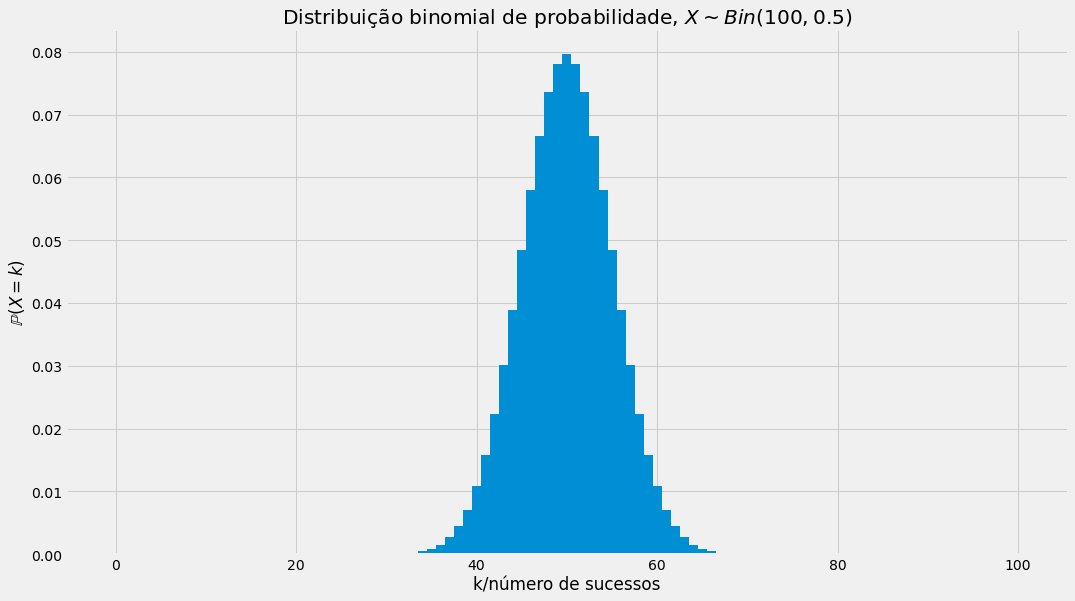

In [32]:
# definimos uma biomial com n = 100, e p = 0.5,
# equivalente à 100 lançamentos de uma moeda que 
# tem 50% de probabilidade de resultar cara,
# ou 50% de resultar coroa
binomial = stats.binom(n=100, p=0.5)

# usamos agora o método .rvs(<tamanho>)
# para gerar alguns possíveis resultados
amostras_bimomial = binomial.rvs(100)

print(f"Amostras binomial: {amostras_bimomial}")

# podemos usar o objeto para calcular a probabilidade
# k sucessos, com o método .pmf()
print(f"Probabilidade X = 1 sucesso: {binomial.pmf(1):.2f}")
print(f"Probabilidade X = 10 sucessos: {binomial.pmf(42):.2f}")
print(f"Probabilidade X = 42 sucesso: {binomial.pmf(48):.2f}")
print(f"Probabilidade X = 90 sucesso: {binomial.pmf(61):.2f}")

# vejamos qual a probabilidade para cada um dos eventos
# podemos encontrar 0, 1, 2, ..., 98, 99 ou 100 sucessos
X = np.arange(0, 101, 1)

print(f"Possíveis valores: {X}")

pmf = binomial.pmf(X)

fig, ax = plt.subplots(figsize=(16,9))

ax.bar(
    X,
    pmf,
    width=1
)

ax.set_xlabel("k/número de sucessos")
ax.set_ylabel("$\mathbb{P}(X = k)$")
ax.set_title("Distribuição binomial de probabilidade, $X \sim Bin(100, 0.5)$");

### 3.1.3. A distribuição de Poisson

A última distribuição discreta que abordaremos é chamada distribuição de Poisson. Ela aparece na modelagem de fenômenos de contagem, ou para eventos que ocorrem com uma determinada frequência no tempo. Ela é parametrizada por um parâmetro chamado taxa, representado pela letra grega lâmbda, $\lambda$. Assim, se $X$ segue uma distribuição de Poissson escrevemos $X \sim \text{Pois}(\lambda)$. Sua função massa de probabilidade é:

\begin{equation}
    \mathbb{P}(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
\end{equation}

Aqui, $e$ é o número de Euler, e $k$ é o número de ocorrências. Não precisamos nos preocupar com a matemática nesse momento. Portanto, vejamos um exemplo para entender melhor essa distribuição.

#### Exemplo

Considere que em uma determinada população, observamos uma média de duas visitas ao pronto socorro por ano, dessa maneira a taxa de interesse é $\lambda = 2$. Usaremos a classe `stats.poisson` da biblioteca `scipy.stats` para analisar o comportamento da variável aleatória.

Amostra de 100 casos: [2 2 2 1 1 3 2 0 2 1 4 5 1 0 2 1 0 0 3 4 2 3 2 0 0 1 1 0 3 1 3 3 4 0 4 3 2
 0 2 2 2 2 2 3 1 3 4 1 2 0 2 3 3 0 2 1 1 3 0 1 0 2 2 3 3 5 2 2 5 1 1 2 0 3
 2 5 4 1 3 2 1 2 2 2 0 1 3 3 1 1 1 4 2 5 3 2 1 1 1 1]
Probabilidade de X = 0 visitas: 0.14
Probabilidade de X = 1 visitas: 0.27
Probabilidade de X = 2 visitas: 0.27
Probabilidade de X = 3 visitas: 0.18
Possíveis números de visitas: [0 1 2 3 4 5 6 7 8 9]


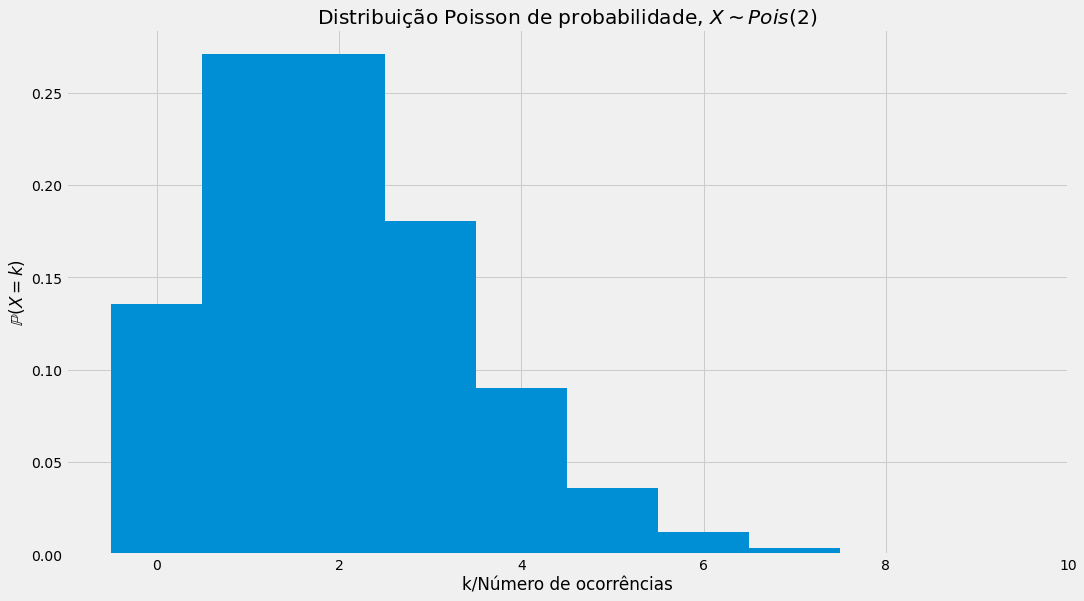

In [39]:
# instanciamos a variável aleatória por stats.poisson(taxa)
poisson = stats.poisson(2)

# alguns possíveis valores que a variável pode obter
# podem ser observados por uma amostra aleatória
print(f"Amostra de 100 casos: {poisson.rvs(100)}")

# além disso, podemos usar o método .pmf() para calcular a
# probabilidade de k visitas ao PS
print(f"Probabilidade de X = 0 visitas: {poisson.pmf(0):.2f}")
print(f"Probabilidade de X = 1 visitas: {poisson.pmf(1):.2f}")
print(f"Probabilidade de X = 2 visitas: {poisson.pmf(2):.2f}")
print(f"Probabilidade de X = 3 visitas: {poisson.pmf(3):.2f}")

# faremos também um gráfico da distribuição, nesse caso, avaliaremos
# 10 possíveis valores: 0, 1, ..., 9
# a rigor uma variável aleatória de Poisson pode qualquer valor inteiro
# maior que zero, mas nos basta olhar apenas esse intervalo

X = np.arange(0, 10, 1)

print(f"Possíveis números de visitas: {X}")

pmf = poisson.pmf(X)

fig, ax = plt.subplots(figsize=(16,9))

ax.bar(
    X, 
    pmf,
    width=1
)

ax.set_xlabel("k/Número de ocorrências")
ax.set_ylabel("$\mathbb{P}(X = k)$")
ax.set_title("Distribuição Poisson de probabilidade, $X \sim Pois(2)$");